In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE, ADASYN
from scipy.stats import uniform
import joblib


In [4]:
data = pd.read_csv('bank_data_train.csv')
data = data.set_index('ID').sort_index(axis=1)

In [4]:
data.head()

,AGE,AMOUNT_RUB_ATM_PRC,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_NAS_PRC,AMOUNT_RUB_SUP_PRC,APP_CAR,APP_COMP_TYPE,APP_DRIVING_LICENSE,APP_EDUCATION,APP_EMP_TYPE,...,TURNOVER_CC,TURNOVER_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CUR_1M,TURNOVER_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_IL_1M,TURNOVER_DYNAMIC_IL_3M,TURNOVER_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_PAYM
ID,,,,,,,,,,,,,,,,,,,,,
146841,660,1.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.131910,0.442285,0.0,0.0,0.0,0.0,0.0
146842,552,0.410691,0.041033,0.0,0.244678,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.101934,0.515876,0.0,0.0,0.0,0.0,0.0
146843,420,0.925140,0.006915,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.121041,0.522833,0.0,0.0,0.0,0.0,0.0
146844,372,1.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000005,0.000189,0.0,0.0,0.0,0.0,0.0
146845,288,1.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.177869,0.593648,0.0,0.0,0.0,0.0,0.0


In [5]:
data.describe()

,AGE,AMOUNT_RUB_ATM_PRC,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_NAS_PRC,AMOUNT_RUB_SUP_PRC,APP_REGISTR_RGN_CODE,AVG_PCT_DEBT_TO_DEAL_AMT,AVG_PCT_MONTH_TO_PCLOSE,CLNT_SALARY_VALUE,CLNT_SETUP_TENOR,...,TURNOVER_CC,TURNOVER_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CUR_1M,TURNOVER_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_IL_1M,TURNOVER_DYNAMIC_IL_3M,TURNOVER_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_PAYM
count,355190.000000,316867.000000,316867.000000,316867.000000,316867.000000,60550.000000,1888.000000,1628.000000,712.000000,355190.000000,...,3.551900e+05,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,3.551900e+05
mean,457.148073,0.598252,0.044045,0.023971,0.085249,50.947498,0.322192,-2.673593,37060.533806,4.377001,...,4.963772e+02,0.000883,0.004309,0.204254,0.484825,0.001305,0.003976,0.025108,0.071906,1.446766e+04
std,136.435457,0.363546,0.108449,0.090774,0.142310,21.777855,0.363298,4.516854,55084.111834,2.936530,...,1.234083e+04,0.027321,0.059852,0.254973,0.331606,0.029118,0.052736,0.104482,0.206863,1.459378e+05
min,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.623656,0.750000,0.345592,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,348.000000,0.268672,0.000000,0.000000,0.000000,33.000000,0.000000,-3.227529,10178.715000,1.781187,...,0.000000e+00,0.000000,0.000000,0.014579,0.218582,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,432.000000,0.689935,0.000000,0.000000,0.027117,54.000000,0.089863,-0.941628,19396.330000,3.894098,...,0.000000e+00,0.000000,0.000000,0.127528,0.494372,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,552.000000,0.954526,0.036608,0.010536,0.110005,72.000000,0.697071,-0.214083,39234.500000,6.555388,...,0.000000e+00,0.000000,0.000000,0.255788,0.726874,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1128.000000,1.000000,1.000000,1.000000,1.000000,89.000000,1.226928,0.995520,487300.000000,13.748937,...,3.753042e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.628044e+07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355190 entries, 146841 to 590828
Columns: 115 entries, AGE to TURNOVER_PAYM
dtypes: float64(94), int64(8), object(13)
memory usage: 314.3+ MB


In [5]:
data_copy = data.copy()

In [6]:
# filling null values for numerical columns.
imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [7]:
# verifying null values in numerical columns
data[numerical_cols].isna().sum().any()

False

In [8]:
#identifying null values for categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols].isna().sum()

APP_CAR                        297934
APP_COMP_TYPE                  287828
APP_DRIVING_LICENSE            297933
APP_EDUCATION                  287086
APP_EMP_TYPE                   287828
APP_KIND_OF_PROP_HABITATION    295829
APP_MARITAL_STATUS             286956
APP_POSITION_TYPE              294645
APP_TRAVEL_PASS                297933
CLNT_JOB_POSITION              144379
CLNT_JOB_POSITION_TYPE         310409
CLNT_TRUST_RELATION            285769
PACK                                0
dtype: int64

In [9]:
# filling null values in categorical cols
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

#verifying
data[categorical_cols].isna().sum().any()

False

#### checking and handling outliers in the data


In [10]:
numerical_cols = numerical_cols.drop(['TARGET'])
print('Total numerical columns :',len(numerical_cols))

Total numerical columns : 101


In [11]:
# data splitting
X = data.drop(columns='TARGET')
y = data['TARGET']

In [12]:
# checking skewness and kurtosis to find distribution of data
for col in numerical_cols:
    if round(X[col].skew()) == 0 and round(X[col].kurt() == 3):
        pass
    else:
        print('Not Normal distribution')
        break;
    print('Normal distribution')


Not Normal distribution


#### Since, data is not normally distributed, we won't use z-score to identify outliers instead we will use inter-quartile method for that

In [20]:
X.describe() # to see difference between 3rd quantile and maximum (to differentiate the outliers)

,AGE,AMOUNT_RUB_ATM_PRC,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_NAS_PRC,AMOUNT_RUB_SUP_PRC,APP_REGISTR_RGN_CODE,AVG_PCT_DEBT_TO_DEAL_AMT,AVG_PCT_MONTH_TO_PCLOSE,CLNT_SALARY_VALUE,CLNT_SETUP_TENOR,...,TURNOVER_CC,TURNOVER_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CUR_1M,TURNOVER_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_IL_1M,TURNOVER_DYNAMIC_IL_3M,TURNOVER_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_PAYM
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,...,3.551900e+05,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,3.551900e+05
mean,457.148073,0.598252,0.044045,0.023971,0.085249,50.947498,0.322192,-2.673593,37060.533806,4.377001,...,4.963772e+02,0.000883,0.004309,0.204254,0.484825,0.001305,0.003976,0.025108,0.071906,1.446766e+04
std,136.435457,0.343374,0.102432,0.085737,0.134414,8.991638,0.026480,0.305703,2464.514615,2.936530,...,1.234083e+04,0.027321,0.059852,0.254973,0.331606,0.029118,0.052736,0.104482,0.206863,1.459378e+05
min,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.623656,0.750000,0.345592,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,348.000000,0.329420,0.000000,0.000000,0.000000,50.947498,0.322192,-2.673593,37060.533806,1.781187,...,0.000000e+00,0.000000,0.000000,0.014579,0.218582,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,432.000000,0.603638,0.003523,0.000862,0.041014,50.947498,0.322192,-2.673593,37060.533806,3.894098,...,0.000000e+00,0.000000,0.000000,0.127528,0.494372,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,552.000000,0.932063,0.044045,0.023971,0.095284,50.947498,0.322192,-2.673593,37060.533806,6.555388,...,0.000000e+00,0.000000,0.000000,0.255788,0.726874,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1128.000000,1.000000,1.000000,1.000000,1.000000,89.000000,1.226928,0.995520,487300.000000,13.748937,...,3.753042e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.628044e+07


In [13]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [14]:
# applying the outlier handling function to all numerical columns
for col in numerical_cols:
    X[col] = handle_outliers_iqr(X[col])

In [22]:
X.describe()

,AGE,AMOUNT_RUB_ATM_PRC,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_NAS_PRC,AMOUNT_RUB_SUP_PRC,APP_REGISTR_RGN_CODE,AVG_PCT_DEBT_TO_DEAL_AMT,AVG_PCT_MONTH_TO_PCLOSE,CLNT_SALARY_VALUE,CLNT_SETUP_TENOR,...,TURNOVER_CC,TURNOVER_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CUR_1M,TURNOVER_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_IL_1M,TURNOVER_DYNAMIC_IL_3M,TURNOVER_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_PAYM
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,3.551900e+05,3.551900e+05,3.551900e+05,3.551900e+05,355190.000000,...,355190.0,355190.0,355190.0,355190.000000,355190.000000,355190.0,355190.0,355190.0,355190.0,355190.0
mean,456.862795,0.598252,0.027007,0.011788,0.068293,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,4.376998,...,0.0,0.0,0.0,0.180193,0.484825,0.0,0.0,0.0,0.0,0.0
std,135.501587,0.343374,0.037074,0.018051,0.077308,1.378881e-10,2.031822e-12,1.478508e-11,2.067685e-07,2.936522,...,0.0,0.0,0.0,0.190744,0.331606,0.0,0.0,0.0,0.0,0.0
min,168.000000,0.000000,0.000000,0.000000,0.000000,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,0.345592,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,348.000000,0.329420,0.000000,0.000000,0.000000,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,1.781187,...,0.0,0.0,0.0,0.014579,0.218582,0.0,0.0,0.0,0.0,0.0
50%,432.000000,0.603638,0.003523,0.000862,0.041014,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,3.894098,...,0.0,0.0,0.0,0.127528,0.494372,0.0,0.0,0.0,0.0,0.0
75%,552.000000,0.932063,0.044045,0.023971,0.095284,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,6.555388,...,0.0,0.0,0.0,0.255788,0.726874,0.0,0.0,0.0,0.0,0.0
max,858.000000,1.000000,0.110113,0.059927,0.238211,5.094750e+01,3.221921e-01,-2.673593e+00,3.706053e+04,13.716690,...,0.0,0.0,0.0,0.617602,1.000000,0.0,0.0,0.0,0.0,0.0


In [15]:
# further Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
y.value_counts() #needs to perform oversampling or some kind of likewise method

TARGET
0.0    326265
1.0     28925
Name: count, dtype: int64

#### Data transformation and reduction

In [18]:
#transforming columns
ct = ColumnTransformer(
                        transformers=[
                                      ('num', StandardScaler(), numerical_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore', max_categories=100), categorical_cols)
                                     ])

#fit_transform the training data, and transform the testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [19]:
# applying SMOTE for oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_transformed, y_train)

In [20]:
y_train_resampled.value_counts()

TARGET
1.0    230012
0.0    228385
Name: count, dtype: int64

### Model building

In [32]:
#model building
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test_transformed)

SVM was taking too much time. since, it has time complexity of 𝑂(𝑛 samples × 𝑛 features), using it is not a feasible solution.

Taking a subset of data to test SVM

In [44]:
X_subset, _, y_subset, _ = train_test_split(X_train_resampled, y_train_resampled, train_size=10000, stratify=y_train_resampled, random_state=42)

In [45]:
print(X_subset.shape, y_subset.shape)

(10000, 178) (10000,)


In [46]:
y_subset.value_counts()

TARGET
1.0    5034
0.0    4966
Name: count, dtype: int64

In [47]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_subset, y_subset)

y_pred_svm = svm_model.predict(X_test_transformed)

In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.5121953508450876
              precision    recall  f1-score   support

         0.0       0.92      0.51      0.66     97880
         1.0       0.08      0.49      0.14      8677

    accuracy                           0.51    106557
   macro avg       0.50      0.50      0.40    106557
weighted avg       0.85      0.51      0.62    106557



### using different kernels and tuning hyperparameters

In [ ]:
param_dist = {'kernel': ['poly', 'sigmoid'],
    'C': uniform(loc=0.001, scale=1000),
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5] 

}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_subset, y_subset)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

best_svm_model = random_search.best_estimator_

In [53]:
print(best_svm_model)

SVC(C=992.6678216154291, coef0=0.5, gamma='auto', kernel='poly')


In [55]:
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters found:  {'C': 992.6678216154291, 'coef0': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score:  0.7402


In [54]:
y_pred_svm_rm = best_svm_model.predict(X_test_transformed)

print(classification_report(y_test, y_pred_svm_rm))

              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76     97880
         1.0       0.08      0.35      0.13      8677

    accuracy                           0.63    106557
   macro avg       0.50      0.50      0.45    106557
weighted avg       0.85      0.63      0.71    106557



### model is still performing poor on class 1, will try introducing class weights on unbalanced data as when we are doing oversampling, some bias is always created towards one or other or will be undersampling the majority class

## more pre-processing

In [21]:
# Drop columns with too many missing values
threshold = 0.6  # Set your threshold here
cols_to_drop = data_copy.columns[data_copy.isnull().mean() > threshold]
data_cleaned = data_copy.drop(cols_to_drop, axis=1)

In [22]:
data_cleaned.head()

,AGE,AMOUNT_RUB_ATM_PRC,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_NAS_PRC,AMOUNT_RUB_SUP_PRC,CLNT_JOB_POSITION,CLNT_SETUP_TENOR,CNT_ACCEPTS_MTP,CNT_ACCEPTS_TK,CNT_TRAN_ATM_TENDENCY1M,...,TURNOVER_CC,TURNOVER_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CUR_1M,TURNOVER_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_IL_1M,TURNOVER_DYNAMIC_IL_3M,TURNOVER_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_PAYM
ID,,,,,,,,,,,,,,,,,,,,,
146841,660,1.000000,0.000000,0.0,0.000000,начальник отдела,1.593023,NaN,NaN,0.101695,...,0.0,0.0,0.0,0.131910,0.442285,0.0,0.0,0.0,0.0,0.0
146842,552,0.410691,0.041033,0.0,0.244678,NaN,1.587647,NaN,NaN,0.166667,...,0.0,0.0,0.0,0.101934,0.515876,0.0,0.0,0.0,0.0,0.0
146843,420,0.925140,0.006915,0.0,0.000000,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,1.587647,0.0,0.0,0.133333,...,0.0,0.0,0.0,0.121041,0.522833,0.0,0.0,0.0,0.0,0.0
146844,372,1.000000,0.000000,0.0,0.000000,МЕНЕДЖЕР ИАО,1.583333,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000005,0.000189,0.0,0.0,0.0,0.0,0.0
146845,288,1.000000,0.000000,0.0,0.000000,NaN,1.583333,NaN,NaN,0.172414,...,0.0,0.0,0.0,0.177869,0.593648,0.0,0.0,0.0,0.0,0.0


In [23]:
data_cleaned.drop_duplicates(inplace=True)

In [24]:
X = data_cleaned.drop(columns='TARGET')
y = data_cleaned['TARGET']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

data_imputed = preprocessor.fit_transform(X)
data_imputed = pd.DataFrame(data_imputed, columns=numerical_cols.tolist() + categorical_cols.tolist())


In [25]:
# applying the outlier handling function to all numerical columns
for col in numerical_cols:
    data_imputed[col] = handle_outliers_iqr(data_imputed[col])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_imputed,y, test_size=0.2, random_state=42, stratify=y)


In [27]:
#transforming columns

ct = ColumnTransformer(
                        transformers=[
                                      ('num', StandardScaler(), numerical_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore', min_frequency=10), categorical_cols)
                                     ])

#fit_transform the training data, and transform the testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [28]:
# data reduction  using svd
n_components = 10

svd = TruncatedSVD(n_components=n_components)

X_train_reduced = svd.fit_transform(X_train_transformed)

X_test_reduced = svd.transform(X_test_transformed)

In [29]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

# data resampling
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_transformed, y_train)



In [42]:
print(f"Numeric columns : {numerical_cols}")
print(f"categorical columns : {categorical_cols}")

Numeric columns : Index(['AGE', 'AMOUNT_RUB_ATM_PRC', 'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_NAS_PRC',
       'AMOUNT_RUB_SUP_PRC', 'CLNT_SETUP_TENOR', 'CNT_ACCEPTS_MTP',
       'CNT_ACCEPTS_TK', 'CNT_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY3M',
       'CNT_TRAN_SUP_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY3M', 'CR_PROD_CNT_CC',
       'CR_PROD_CNT_CCFP', 'CR_PROD_CNT_IL', 'CR_PROD_CNT_PIL',
       'CR_PROD_CNT_TOVR', 'CR_PROD_CNT_VCU', 'LDEAL_GRACE_DAYS_PCT_MED',
       'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_ATM',
       'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_POS',
       'PRC_ACCEPTS_A_TK', 'PRC_ACCEPTS_MTP', 'PRC_ACCEPTS_TK', 'REST_AVG_CUR',
       'REST_AVG_PAYM', 'REST_DYNAMIC_CC_1M', 'REST_DYNAMIC_CC_3M',
       'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CUR_3M', 'REST_DYNAMIC_FDEP_1M',
       'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_IL_3M',
       'REST_DYNAMIC_PAYM_1M', 'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_SAVE_3M',
       'SUM_TRAN_ATM_TENDENCY


## using subset

In [30]:
X_class_0 = X_train_transformed[y_train == 0.0]
y_class_0 = y_train[y_train == 0.0]
X_class_1 = X_train_transformed[y_train == 1.0]
y_class_1 = y_train[y_train == 1.0]


X_class_0_sampled, _, y_class_0_sampled, _ = train_test_split(
    X_class_0, y_class_0, 
    train_size=10000, 
    random_state=42
)

X_class_1_sampled, _, y_class_1_sampled, _ = train_test_split(
    X_class_1, y_class_1, 
    train_size=10000, 
    random_state=42
)

In [31]:
# Combine the sampled class 0 data with all class 1 data
X_subset = pd.concat([pd.DataFrame(X_class_0_sampled), pd.DataFrame(X_class_1_sampled)])
y_subset = pd.concat([y_class_0_sampled, y_class_1_sampled])

# Verify the class distribution in the subset
print("Class distribution in the subset:")
print(y_subset.value_counts())

Class distribution in the subset:
TARGET
0    10000
1    10000
Name: count, dtype: int64


In [68]:
#using randomized search to induce parallel processing
param_set = {'degree': [3], 'C':[992.67]}

random_search2 = RandomizedSearchCV(
                            SVC(kernel='poly', coef0=0.5, gamma='auto', class_weight='balanced'),
                            param_distributions=param_set, n_iter=50, cv=5, n_jobs=-1, verbose=2
                        )
random_search2.fit(X_subset, y_subset)

best_model2 = random_search2.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [79]:
y_pred_svm_rm2 = best_model2.predict(X_train_transformed)
print("Best cross-validation score: ", random_search2.best_score_)
print(classification_report(y_train, y_pred_svm_rm2))

Best cross-validation score:  0.67105
              precision    recall  f1-score   support

           0       0.97      0.65      0.78    228303
           1       0.17      0.80      0.28     20246

    accuracy                           0.66    248549
   macro avg       0.57      0.73      0.53    248549
weighted avg       0.91      0.66      0.74    248549



## ## switching to random forest, not getting good results using svm

In [34]:
clf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train_resampled, y_train_resampled)
print('Training Score : ',clf.score(X_train_resampled, y_train_resampled))
print('Testing Score : ',clf.score(X_test_transformed, y_test))

Training Score :  0.651374362520529
Testing Score :  0.6642399493064846


In [35]:
y_pred = clf.predict(X_test_transformed)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     65230
           1       0.14      0.60      0.23      5785

    accuracy                           0.66     71015
   macro avg       0.54      0.64      0.51     71015
weighted avg       0.88      0.66      0.74     71015



In [ ]:
# parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# randomized Search CV
random_search3 = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search3.fit(X_train_resampled, y_train_resampled)

In [173]:
# best parameters
print("Best parameters found: ", random_search3.best_params_)

# train and evaluate the best model
best_rf_classifier = random_search3.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test_transformed)
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     97880
         1.0       0.18      0.80      0.30      8677

    accuracy                           0.69    106557
   macro avg       0.58      0.74      0.55    106557
weighted avg       0.91      0.69      0.76    106557



## made a little change in feature space (using svd to reduce features)

In [36]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=30, bootstrap=True, class_weight='balanced')
rf.fit(X_train_reduced, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=5, n_estimators=200)

In [37]:
y_pred_best2 = rf.predict(X_test_reduced)
print(classification_report(y_test, y_pred_best2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     65230
           1       0.33      0.03      0.05      5785

    accuracy                           0.92     71015
   macro avg       0.63      0.51      0.51     71015
weighted avg       0.87      0.92      0.88     71015



In [38]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_best2)}")


Accuracy: 0.9161303949869746


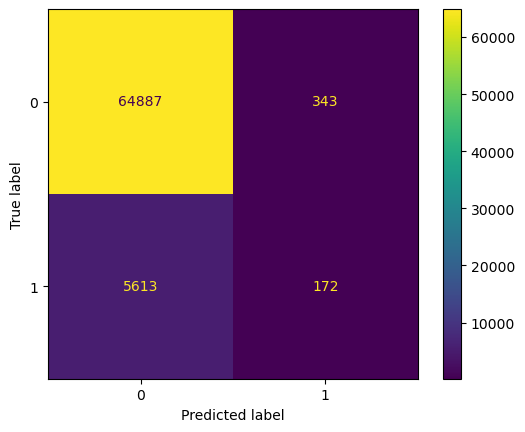

In [39]:
cm = confusion_matrix(y_test, y_pred_best2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### till now, we have managed to increase precision to 0.33 for class 1 which was around 0.1 in earlier models. though, it's still low but atleast we got some improvemnt. Next step may include analysing misclassifications and perform more precise feature generalization

## Deployment

In [40]:
import dill

#final model
with open('model.pkl', 'wb') as file:
    dill.dump(rf, file)

In [44]:
# final pre-processing to use during deployment
with open('preprocessor.pkl', 'wb') as f:
    dill.dump(preprocessor, f)
with open('scaler.pkl', 'wb') as f:
    dill.dump(ct, f)
with open('svd.pkl', 'wb') as f:
    dill.dump(svd, f)